In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


In [3]:
# import data
data = pd.read_csv('../data/cleaned/2017-2021_aggregated_team_offensive_stats_with_sb.csv')

In [109]:
# finding variables with significant statistical difference between population and sample
def ttest_ind_2(df1, y, y_val, y_val2):
    df1_num = df1.loc[df1[y] == y_val].select_dtypes(np.number)
    df2_num = df1.loc[df1[y] == y_val2].select_dtypes(np.number)
    for col in df1_num.columns:
        stat, pval = st.ttest_ind(df1_num[col], df2_num[col], axis=0, random_state=9)
        if pval > 0.975:
            print(col, stat, pval)
        elif pval < 0.025:
            print(col, stat, pval)

In [110]:
ttest_ind_2(data,'sb_appearance',1,0)

year 0.0 1.0
rush_40+ -2.415240393532334 0.01686626567062536
pass_att 3.1848506610975695 0.0017450412472373486
pass_cmp 3.414275062503485 0.0008127192891547928
pass_yds 3.6587648916889517 0.0003449055107483282
sck -3.138259871223912 0.002028155161349757
SckY -3.1381631531591188 0.0020287847935228894
pass_20+ 3.6011053249700287 0.0004238286047441162
pass_40+ 0.012001084096256156 0.9904398902179359
pass_rec_1st 3.85401086104693 0.0001686541572044451
total_plays 2.541760270281386 0.011992243647983222
sb_winner 12.170661444638085 1.8391416092073175e-24
sb_appearance inf 0.0


/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [112]:
# these are the selected colums for X
selected_columns=[
'rush_40+', 'pass_att', 'pass_cmp', 'pass_yds',
'sck', 'SckY', 'pass_20+', 'pass_40+', 'pass_rec_1st', 'total_plays']

In [ ]:
# Normal dist test

In [47]:
# checking for normal distribution
def normaltest_mult_col(df):
    '''
    '''
    df_num = df.select_dtypes(np.number)

    for col in df_num.columns:
        statistic, pvalue = st.normaltest(df_num[col], axis=0, nan_policy='propagate')
        if pvalue >0.975:
            print(f'{col}:', statistic, (pvalue))
        elif pvalue < 0.025:
            print(f'{col}:', statistic, (pvalue))

In [48]:
normaltest_mult_col(data)

year: 121.27339856778241 4.6325071700531e-27
rush_att: 7.746874146016795 0.020786800750500375
rush_yds: 33.136098532943606 6.376577283621199e-08
rush_20+: 31.119063216780447 1.748160413165219e-07
rush_40+: 12.852524854366026 0.001618488763465122
rush_1st: 17.02963864006027 0.00020047533824993415
rush_fumbles: 16.353534432507544 0.0002811092381654222
rec_td: 8.055733607388774 0.017812286558702626
2pt: 37.21820054264154 8.282671535943633e-09
int: 16.285354146800454 0.00029085750815909455
rec_fumbles: 7.790079419915741 0.020342566630657644
4th_att: 8.797606220436435 0.012292043323177262
sb_winner: 204.40341788793134 4.114923489024037e-45
sb_appearance: 142.8719574249551 9.456896496524668e-32
passtd_rushtd_ratio: 116.5556175924099 4.900825310461912e-26


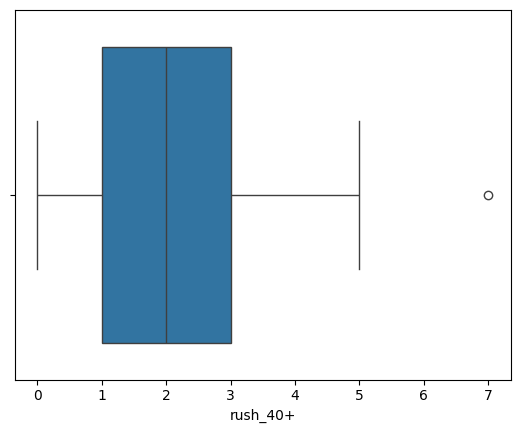

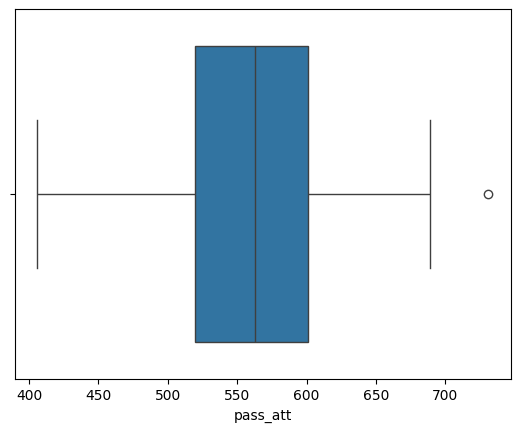

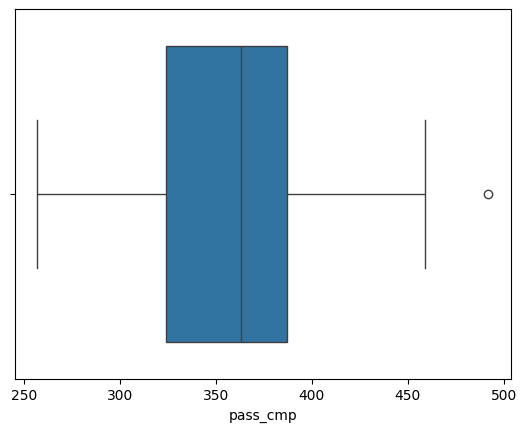

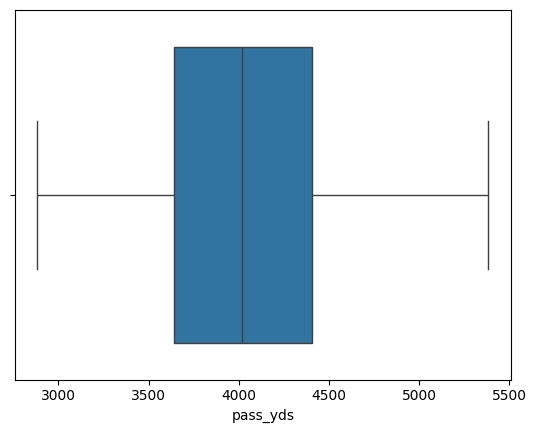

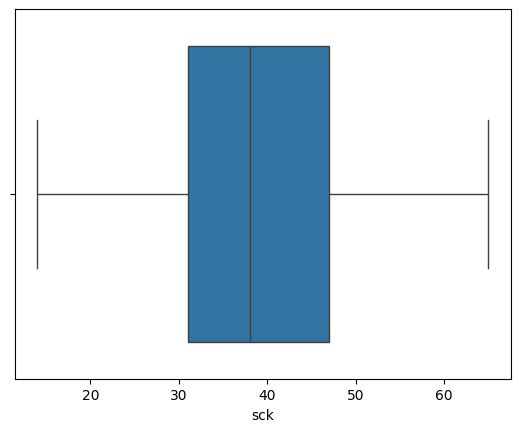

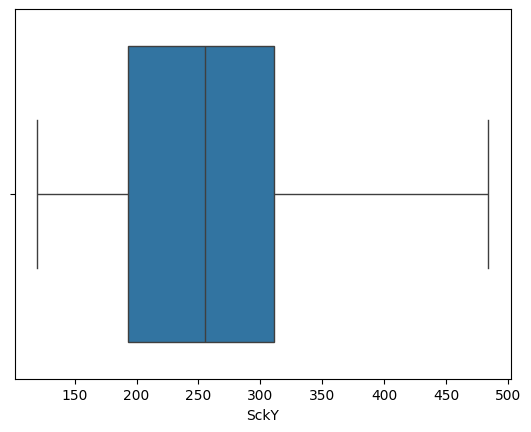

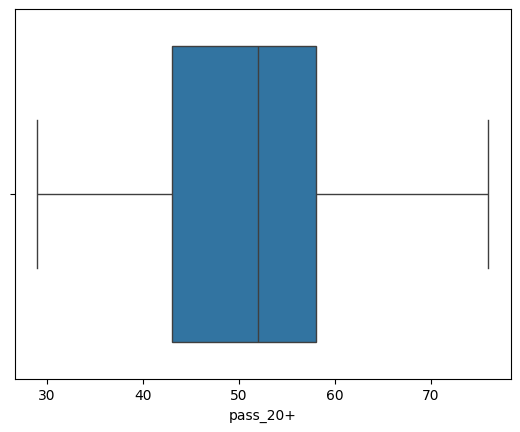

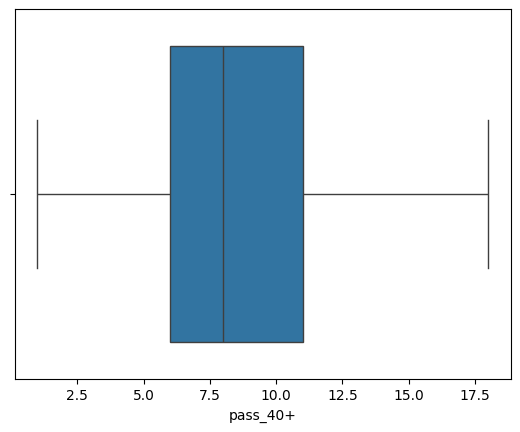

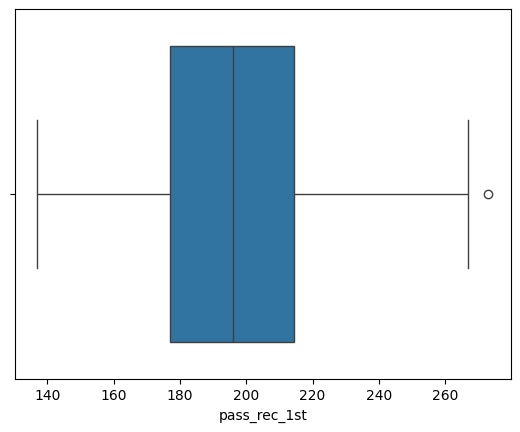

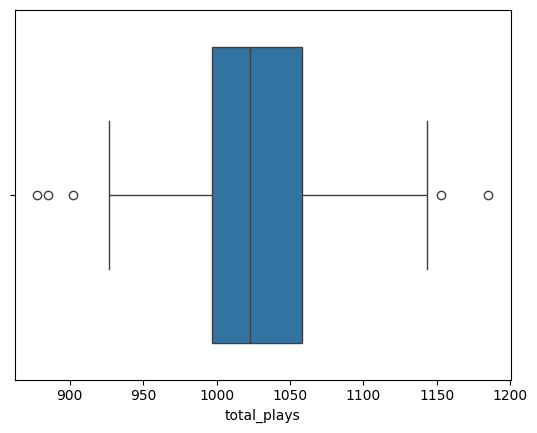

In [113]:
# visual check, some outliers in some of the selected columns.
df_num = data.select_dtypes(np.number)

for col in selected_columns:
    sns.boxplot(data=df_num, x=col)
    plt.show()

In [76]:
# define function to check selected columns'. skewness

def skewness(df, columns):
    for col in columns:
        skewness = df[col].skew()
        if (skewness < 0.5 and skewness > -0.5):
            print(f'{col} skewness, close to symmetrical: ',skewness)
        elif (skewness > 0.5):
            print(f'{col} skewness, positive skewed: ',skewness)
        else:
            print(f'{col} skewness, negative skewed: ',skewness)

In [77]:
# call function
skewness(df_num, selected_columns)

rush_40+ skewness, positive skewed:  0.7394412748342206
pass_att skewness, close to symmetrical:  -0.025679182487384135
pass_cmp skewness, close to symmetrical:  0.10904545663522111
pass_yds skewness, close to symmetrical:  0.22426582697510883
sck skewness, close to symmetrical:  0.08614313376836936
SckY skewness, close to symmetrical:  0.2505208265722574
pass_20+ skewness, close to symmetrical:  0.1861731140278374
pass_40+ skewness, close to symmetrical:  0.4891680769174413
pass_rec_1st skewness, close to symmetrical:  0.26158263126346376
total_plays skewness, close to symmetrical:  0.055151197835882335


In [64]:
data[selected_columns].describe()

,rush_40+,pass_att,pass_cmp,pass_yds,sck,SckY,pass_20+,pass_40+,pass_rec_1st,total_plays
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.00000,160.000000,160.000000,160.000000
mean,1.912500,560.887500,359.537500,4032.237500,38.318750,256.81250,50.73125,8.687500,196.143750,1028.550000
std,1.527062,56.853335,43.736042,541.103397,10.605785,76.46812,10.31560,3.391049,29.030855,52.860419
min,0.000000,406.000000,257.000000,2884.000000,14.000000,120.00000,29.00000,1.000000,137.000000,878.000000
25%,1.000000,519.750000,324.000000,3641.750000,31.000000,192.75000,43.00000,6.000000,177.000000,997.000000
50%,2.000000,563.000000,363.000000,4017.000000,38.000000,255.00000,52.00000,8.000000,196.000000,1023.000000
75%,3.000000,601.250000,387.000000,4405.000000,47.000000,310.75000,58.00000,11.000000,214.250000,1058.000000
max,7.000000,731.000000,492.000000,5383.000000,65.000000,484.00000,76.00000,18.000000,273.000000,1185.000000


### X y splitting

In [85]:
# X-y split and train-test-split before transformations / scaling

y = data['sb_appearance']
X = data[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

# Create new Pandas DataFrames from the X_train and X_test Numpy arrays:

X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [90]:
print(y.shape)
print(X.shape)
print(X_train_df.shape)
print(X_test_df.shape)

(160,)
(160, 10)
(112, 10)
(48, 10)


In [91]:
X.info() #all selected X variables are numerical #all continuous?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rush_40+      160 non-null    int64  
 1   pass_att      160 non-null    float64
 2   pass_cmp      160 non-null    float64
 3   pass_yds      160 non-null    float64
 4   sck           160 non-null    float64
 5   SckY          160 non-null    float64
 6   pass_20+      160 non-null    float64
 7   pass_40+      160 non-null    float64
 8   pass_rec_1st  160 non-null    float64
 9   total_plays   160 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.6 KB


### Scaling df

In [95]:
# Scaling data
transformer = MinMaxScaler().fit(X_train_df) 

X_train_normalized = transformer.transform(X_train_df)
X_test_normalized  = transformer.transform(X_test_df)

X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_df.columns, index= X_train_df.index)
X_test_norm  = pd.DataFrame(X_test_normalized, columns=X_test_df.columns, index= X_test_df.index)

In [ ]:
# save scaler WIP
#path = "./"
#filename = "MinMaxScaler.pkl"
#with open(path+filename, "wb") as file:
#    pickle.dump(transformer, file)

### create logistic regression model

In [144]:
classification = LogisticRegression(max_iter=1000, penalty='l2', random_state=0, solver='lbfgs',
                  multi_class='auto')

classification.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [145]:
# model to be saved
#path = "./"
#filename = "classification_logistic_regression.pkl"
#with open(path+filename, "wb") as file:
#    pickle.dump(classification, file)

In [146]:
# Make predictions on the test set: 
# Use the trained model to predict the target variable values for the transformed test data:

y_test_pred = classification.predict(X_test_norm)
print(y_test_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [147]:
# Comparing y_train to y_test_pred below: shows the test has extremely amplified the result '0'
pd.Series(y_train).value_counts()


sb_appearance
0    104
1      8
Name: count, dtype: int64

In [148]:
pd.Series(y_test).value_counts()


sb_appearance
0    46
1     2
Name: count, dtype: int64

In [149]:
pd.Series(y_test_pred).value_counts()


0    48
Name: count, dtype: int64

In [150]:
#Evaluate the model's performance: Now that you have the predicted values (y_test_pred) for the test set,
# you can compare them with the actual target variable values (y_test) to evaluate the model's performance
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred)) # or classification.score(X_test_concat_df, y_test)



0.9583333333333334


In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred)

array([[46,  0],
       [ 2,  0]])

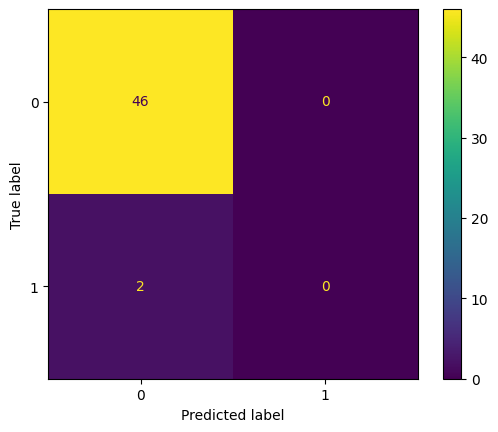

In [152]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

In [153]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred)

0.0

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        46
           1       0.00      0.00      0.00         2

    accuracy                           0.96        48
   macro avg       0.48      0.50      0.49        48
weighted avg       0.92      0.96      0.94        48



/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

### Sampling issues and solutions

In [130]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here

sm = SMOTE(random_state=77,k_neighbors=5)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [131]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(112, 10)
(208, 10)


In [132]:
y_train_SMOTE.value_counts()

sb_appearance
0    104
1    104
Name: count, dtype: int64

### create logistic regression model

In [165]:
classification_s = LogisticRegression(max_iter=1000, random_state=0, solver='liblinear',
                  multi_class='auto')

classification_s.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [166]:
# model to be saved
#path = "./"
#filename = "classification_logistic_regression.pkl"
#with open(path+filename, "wb") as file:
#    pickle.dump(classification, file)

In [167]:
# Make predictions on the test set: 
# Use the trained model to predict the target variable values for the transformed test data:

y_test_pred_s = classification_s.predict(X_test_norm)
print(y_test_pred_s)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1]


In [168]:
# Comparing y_train to y_test_pred below: shows the test has extremely amplified the result '0'
pd.Series(y_train_SMOTE).value_counts()


sb_appearance
0    104
1    104
Name: count, dtype: int64

In [169]:
pd.Series(y_test).value_counts()


sb_appearance
0    46
1     2
Name: count, dtype: int64

In [170]:
pd.Series(y_test_pred).value_counts()


0    48
Name: count, dtype: int64

In [171]:
#Evaluate the model's performance: Now that you have the predicted values (y_test_pred) for the test set,
# you can compare them with the actual target variable values (y_test) to evaluate the model's performance
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred_s)) # or classification.score(X_test_concat_df, y_test)



0.8541666666666666


In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred_s)

array([[39,  7],
       [ 0,  2]])

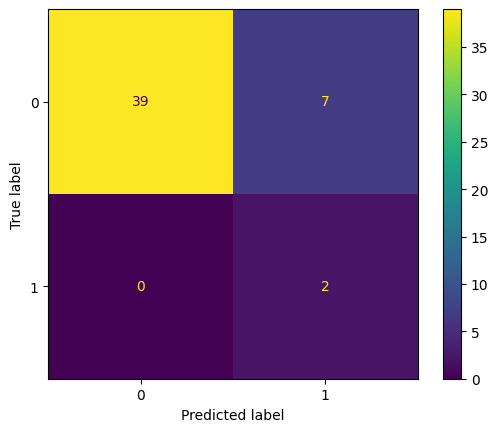

In [173]:
cm_test = confusion_matrix(y_test, y_test_pred_s)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

In [174]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred_s)

0.31707317073170727

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_s))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        46
           1       0.22      1.00      0.36         2

    accuracy                           0.85        48
   macro avg       0.61      0.92      0.64        48
weighted avg       0.97      0.85      0.89        48

